In [12]:
using LinearAlgebra, RowEchelon, LaTeXStrings, Plots, SymPy, LAcode
##] dev --local "."
title( "The Singular Value Decomposition", sz=30, color="darkred")

HTML{String}("<div><p style=\"color:darkred;font-size:30pt;height:15px;text-align:left;\">The Singular Value Decomposition</p></div>")

# 1. Motivation

## 1.1 Generalize the Idea of an Eigendecomposition

The Eigendecomposition of a matrix $A$ has shortcomings: 
* A square matrix $A$ may or may not have a **complete eigenvector basis**
* There is no eigendecomposition for **matrices that are not square.**

> The case $A$ of size $M \times N$ with $M \ne N$ shows a restiction<br> we had imposed to find the eigendecomposition:<br>
$\quad\quad$ **we used the same basis vectors** $s_1, s_2, \dots s_n$ in both the domain and the codomain of $y = A x$.


<div style="float:left;width:15cm;border:1px solid black;">

$\;$**Idea:** use different bases for $y = A x.$
$$\left. \begin{align}
x &= V \tilde{x} \\
    y &= U \tilde{y}
\end{align}\right\}\quad \Rightarrow \quad U \tilde{y} = A V \tilde{x}
\quad \Rightarrow \quad \tilde{y} = U^{-1} A V \tilde{x} = \Sigma \tilde{x},
$$

$\quad\quad$ where we have set $\Sigma = U^{-1} A V \Leftrightarrow A = U \Sigma V^{-1}.$
</div>
<div style="float:right;border:1px solid black;width:9cm;height:3.1cm;">
$\;$ Better yet, let us try for orthonormal bases:

$$
U^{-1} = U^t, \; \text{ and }\; V^{-1} = V^t.
$$

$\;$**Remark: the matrix sizes are**<br>
$\quad\quad A_{M\times N}, \Sigma_{M\times N}, V_{N \times N}, U_{M \times M}$. 
</div>

> What should $\Sigma$ look like? We would like a diagonal matrix, but $\Sigma$ is not square in general.
Let us try for
$$
\Sigma = \begin{pmatrix} \Sigma_r & 0 \\ 0 & 0 \end{pmatrix},
$$
where $\Sigma_r$ is a square diagonal matrix of size $r \times r$ with $r$ non-zero entries on the diagonal,<br>
and zero entries to fill out the remaining entries in a matrix of size $M \times N$.

> **Examples:**
>
> $\quad\quad
\left( \begin{array}{cc|c} \color{red}5 & \color{red}0 & 0 \\ \color{red}0 & \color{red}1 & 0 \\ \hline 0 & 0 & 0 \end{array}\right),\quad
\left( \begin{array}{cc|c} \color{red}5 & \color{red}0 & 0 \\ \color{red}0 & \color{red}1 & 0\end{array}\right), \quad
\left( \begin{array}{cc} \color{red}5 & \color{red}0 \\ \color{red}0 & \color{red}1 \\ \hline 0 & 0 \end{array}\right),\quad
$
where the $\color{red}{\Sigma_r}$ entries are shown in red.

## 1.2 Is this Feasible?

<div style="float:left;with:15cm;">

Consider $A = U \Sigma V^t.$<br>
We can manipulate this equation in various ways:

$$\begin{align}
A = U \Sigma V^t & \quad \Leftrightarrow \quad &  A V & = \Sigma U \label{eqn1}\tag{1} \\
A = U \Sigma V^t & \quad \Rightarrow \quad  & A^t A & = V \Sigma^t \Sigma V^t \label{eqn2}\tag{2} \\
A = U \Sigma V^t & \quad \Rightarrow \quad  & A A^t & = U \Sigma \Sigma^t U^t \label{eqn3}\tag{3} \\
\end{align}
$$
</div>

**Remarks:**
* $\Sigma^t \Sigma = \begin{pmatrix} \Sigma_r^2 & 0 \\ 0 & 0 \end{pmatrix}$ is a diagonal matrix of size $N \times N.$
* $\Sigma \Sigma^t = \begin{pmatrix} \Sigma_r^2 & 0 \\ 0 & 0 \end{pmatrix}$ is a diagonal matrix of size $M \times M.$

* Eqn 2:  $\;A^tA = V ( \Sigma^t \Sigma) V^t \quad$ is an orthogonal eigendecomposition  of the symmetric matrix $A^t A.$<br>
$\quad\quad$  An orthogonal matrix $V$ and a diagonal matrix $\Sigma^t \Sigma$ do exist
* Eqn 3:  $\;AA^t = U ( \Sigma \Sigma^t) U^t \quad$ is an orthogonal eigendecomposition  of the symmetric matrix $A A^t.$<br>
$\quad\quad$  An orthogonal matrix $U$ and a diagonal matrix $\Sigma \Sigma^t$ do exist

> What is not clear is whether the diagonal matrices $\Sigma^t \Sigma$ and $\Sigma \Sigma^t$  are related:
> * **do they share the same non-zero entries $\Sigma_r^2?$**

* Eqn 1: $\; A U = V \Sigma \quad$ further posits a relationship between $U$ and $V.$
> **Is this relationship satisfied?**

# 2. The Gram Matrix $A^t A$

Some reminders for matrices $A$ of size $M \times N$

##### **Rank and the Dimension of the Null Spaces**

<div style="float:left;width:12cm;height:4cm;border:1px solid black;">

$\;\;$ We have previously seen that $\mathscr{N}(A^t A)\ =\ \mathscr{N}(A).$<br>
$\;\;$ Therefore
* $dim\ \mathscr{N}(A^t A)\ =\ dim\ \mathscr{N}(A) = N -rank(A)$
* $rank\ (A) = rank\ (A^t A)$<br>since both matrices have the same number of columns $N$.
</div>
<div style="float:right;width:12cm;height:4cm;border:1px solid black;">

$\;\;$ Similarly, $\mathscr{N}(A A^t)\ =\ \mathscr{N}(A^t).$<br>
$\;\;$ Therefore
* $dim\ \mathscr{N}(A A^t)\ =\ dim\mathscr{N}(A^t)\ =\ M - rank\ (A^t)$
* $rank\ (A^t)\ =\ rank\ (A A^t)$<br>since both matrices have the same number of columns $M$.
</div>

##### **Dimension of the Eigenspaces for $\lambda = 0$**

<div style="float:left;width:12cm;height:4.5cm;border:1px solid black;">
$\;\;$ We also know that $rank(A) = rank(A^t)\;$<br>
$\;\;$ and that non-zero nullspace vectors are eigenvectors for $\lambda =0$.

* $A, A^t, A^t A$ and $A A^t$ all have the same rank.
* Eigenspace $E_0$ of $A^t A$ has $dim\ \mathscr{N}(A^t A) = N - rank(A)$
* Eigenspace $E_0$ of $A A^t$ has $dim\ \mathscr{N}(A^t A) = M - rank(A)$
* $A^t A$ and $A A^t$ have the same number<br>$rank(A)$ non-zero eigenvalues
</div>
<img src="SVD_ranks.svg" width=400 style="float:right;">

##### **Relationship of Eigenpairs for $A^t A$ and $A A^t$**

<div style="float:left;width:13cm;height:4.5cm;border:1px solid black;">

$\;\;$ Let $(\lambda, x)$ be an eigenpair of $A^t A$. Observe
$$
(A^t A)\ x = \lambda x \Rightarrow (A A^t) (A x) = \lambda (A x)
$$

$\;\;\therefore$ If $A x \ne 0,$ it is an eigenvector of $A A^t.$ Is it?<br><br>

$\;\;$ **$(\lambda \ne 0, x)$ is an eigenpair of $A^t A \Rightarrow (\lambda, A x)$ is an eigenpair of $A A^t.$**<br>
$\;\;$ **$(\lambda \ne 0, x)$ is an eigenpair of $A A^t \Rightarrow (\lambda, A^t x)$ is an eigenpair of $A^t A.$**
</div>
<div style="float:right;width:11cm;height:4.5cm;border:1px solid black;">

$\begin{align}
\left( \lVert A x \rVert^2 \right)&  = \left( (A x) \cdot (A x) \right)\\
& = (A x)^t (A x) \\
& = x^t A^t A x \\
& = \lambda x^t x \\
& = \lambda \left( \lVert x \rVert^2 \right) \ne 0.
\end{align}$

$\;\;$ Since $x$ is an eigenvector $\lVert x \rVert \ne 0 . \quad$
$\therefore \color{red}{A x \ne 0 \;\text{ iff } \lambda \ne 0}.$
</div>

##### **So $A^t A$ and $A A^t$ Have the Same Non-zero Eigenvalues and Corresponding Eigenvectors**

* For the eigenspaces for eigenvalue $\lambda = 0$, we have
    * for $A^t A$, we have $dim\ E_0 = N - rank(A)$
    * for $A A^t$, we have $dim\ E_0 = M - rank(A)$
* Both matrices have the **same dimension for the eigenspaces $dim\ E_\lambda$ for $\lambda \ne 0$**

* **Both $A^t A$ and $A A^t$ share the diagonal matrix $\Sigma_r^2.$**
* **The size of this matrix $r = rank(A).$**

* The eigenvectors of $A^t A$ for the non-zero eigenvalues are **the first $r$ vectors in $V:$**<br>
* The eigenvectors of $A A^t$ for the non-zero eigenvalues are **the first $r$ vectors in $U$.**

* Since the remaining vectors are bases for the null spaces of $A^t A$ and $A A^t$ respectively,<br>
these first $r$ vectors are **bases for the respective row spaces.**

##### **What About Orthogonality?**

Let $(\lambda_1, x_1)$ and $(\lambda_2, x_2)$ be eigenpairs of $A^t A$.<br>
$\quad\quad$ If $x_1 \perp x_2$, we find
$\quad
(A x_1) \cdot (A x_2) = \lambda_1 \lambda_2\; x_1 \cdot x_2 = 0.
$

$\quad\quad$ Since $A x_1$,$A x_2$ are eigenvectors of $A A^t$ provided $\lambda_1 \lambda_2 \ne 0,$ we find

* **Given eigenpairs $(\lambda_1 \ne 0, x_1)$ and $(\lambda_2 \ne 0, x_2)$ of $A^t A$,
  then $(\lambda_1, A x_1, \lambda_2 A x_2)$ are eigenpairs of $A A^t.$<br>
  $\quad\quad$ Further, $x_1 \perp x_2 \Rightarrow A x_1 \perp A x_2.$**
* **Given eigenpairs $(\lambda_1 \ne 0, x_1)$ and $(\lambda_2 \ne 0, x_2)$ of $A A^t$,
  then $(\lambda_1, A^t x_1, \lambda_2 A^t x_2)$ are eigenpairs of $A A^t.$<br>
  $\quad\quad$ Further, $x_1 \perp x_2 \Rightarrow A^t x_1 \perp A^t x_2.$**

##### **The Reduced Decomposition (Compact Decomposition)**

Let's look at the decomposition again, where we partition the $U$ and $V$ matrices to separate out the first $r$ vectors:
$\quad\quad U = \begin{pmatrix} U_r & \tilde{U}_r \end{pmatrix}, \quad V = \begin{pmatrix} V_r & \tilde{V}_r \end{pmatrix}.$<br>

$
\quad\quad A = \begin{pmatrix} U_r & \tilde{U}_r \end{pmatrix}
    \begin{pmatrix} \Sigma_r & 0 \\ 0 & 0 \end{pmatrix}
    \begin{pmatrix} V_r & \tilde{V}_r \end{pmatrix}^t
  = \color{red}{U_r\ \Sigma_r\ V_r^t}.
$

**The null space basis vectors have no effect on this decomposition!**

> As long as we use a basis for the null space of $A^t A$ for $\tilde{V}_r$<br>
and a basis for the null space of $A A^t$ for $\tilde{U}_r$,<br>
we have established that **a decomposition $A V = U \Sigma$ exists!**

But what about orthogonality?

##### **Non-negative Eigenvalues, Orthogonal Eigenvectors**

We need $\Sigma_r$, not $\Sigma_r^2$. Let's look again at the eigenvalues of $A^t A.$

Given an eigenpair $(\lambda, x)$ of $A^t A:$

$$
\begin{align}
A^t A x = \lambda x
& \Rightarrow x^t A^t A x = \lambda x^t x \\
& \Rightarrow \lVert A x \rVert^2 = \lambda \lVert x \rVert^2
& \Rightarrow \lambda \ge 0\quad\text{ since } x \ne 0.
\end{align}$$

$\quad\quad$ **The matrices $A^t A$ and $A A^t$ are positive semidefinite.**

> $\quad\quad \Sigma_r =\begin{pmatrix} \sigma_1  & 0         & \dots & 0 \\
                           0         & \sigma_2  & \dots & 0 \\
                           \dots     & \ldots    & \dots & \dots \\
    0         & 0         & \dots & \sigma_r \end{pmatrix},$
>
> $\quad\quad$ where $\sigma_i\ =\ \sqrt{ \lambda_i },\ i=1,2, \dots r\quad$ <span>are the square roots<br>$\quad\quad$  of the nonzero (and hence positive) eigenvalues of $A^t A.$</span>

> $\quad\quad$ A small refinement: since the $\sigma_i$ are positive reals,<br>
$\quad\quad$ we will **order them by decreasing magnitude:**$\quad\quad
\sigma_1 \ge \sigma_2 \dots \ge \sigma_r.
$

##### **Obtain $U_r$ from $V_r$**

The SVD decomposition requires unit column vectors in $U$ and $V$.

Consider an eigenpair of $(\lambda = \sigma^2 \ne 0, v)$ for $A^t A$ <br>
with the eigenvector scaled to be a unit vector:
$\quad \lVert x \rVert = 1$.

Observe $\quad$
$x^t A^t A x = \sigma^2 x^t x \Rightarrow \lVert A x \rVert^2 = \sigma^2$.

The corresponding unit eigenvector for $A A^t$ is therefore given by $$u = \frac{1}{\sigma} A x.$$
Combining all the eigenvectors into a matrix as columns, we see that
$$
\color{red}{U_r = A V_r \Sigma_R^{-1} \Leftrightarrow A V_r = U_r \Sigma_r}.
$$

# 3. The Singular Value Decomposition

## 3.1 SVD Existence Theorem

<div style="background-color:#F2F5A9;">

**Definition:** Given a matrix $A \in \mathbb{R}^{M \times N}$.<br>
    $\quad\quad$ $A = U \Sigma V^t$ is a **singular value decomposition** of $A$ iff<br>
    $\quad\quad$ $U$ and $V$ are orthogonal matrices, and $\Sigma = \begin{pmatrix} \Sigma_r & 0 \\ 0 & 0 \end{pmatrix}$,<br>
    $\quad\quad$ where $\Sigma_r$ is a diagonal matrix of size $r\times r$, with diagonal entries $\sigma_1 \ge \sigma_2 \dots \ge \sigma_r >0.$
    
$\quad\quad$ The $\sigma_i$ are **singular values** of $A.$<br>
$\quad\quad$ The columns of $V$ are **right singular vectors** of $A.$<br>
$\quad\quad$ The columns of $U$ are **left singular vectors** of $A.$
    
</div>

<div style="background-color:#F2F5A9;">

**Theorem:** Every matrix $A \in \mathbb{R}^{M \times N}$ has a **singular value decomposition** such that<br>
    $\quad\quad$ $A = U \Sigma V^t  = U_r \Sigma_r V_r^t$
<div style="background-color:#F2F5A9;margin:30px;">

* $\Sigma = \begin{pmatrix} \Sigma_r & 0 \\ 0 & 0 \end{pmatrix}$,
    where $\Sigma_r$ is a diagonal matrix of size $r\times r$, with non-negative diagonal entries $\sigma_1 \ge \sigma_2 \dots \ge \sigma_r >0.$
* $r = rank(A)$
* $V = \begin{pmatrix} V_r & \tilde{V}_r \end{pmatrix}$
    * the $r$ columns of $V_r$ form an orthonormal basis for $\mathscr{C}(A)$
    * the $N-r$ columns of $\tilde{V}_r$ form an orthonormal basis for $\mathscr{N}(A)$
* $U = \begin{pmatrix} U_r \tilde{U}_r \end{pmatrix}$
    * the $r$ columns of $V_r$ form an orthonormal basis for $\mathscr{R}(A)$
    * the $M-r$ columns of $\tilde{V}_r$ form an orthonormal basis for $\mathscr{N}(A^t)$
<br><br>
</div></div>

## 3.2 SVD Computation

The derivation shows one way of computing the SVD:
* Start with either $A^t A$ (size $N \times N$, or $A A^t$ (size $M \times M$).<br>
  We typically choose the smaller matrix.<br>

<div style="margin:30px;border:1px solid black;">

* **Compute the orthogonal eigendecomposition of $A^t A.$**<br>
  $\;\;$ this results in $\Sigma_r$, $V_r$<br>
  $\;\;$ and (optionally) an orthogonal basis for $\mathscr{N}(A)$.
  * If the full SVD is required, <br>
    we need to compute an orthogonal basis for $\mathscr{N}(A),$<br>
    and obtain $\Sigma$ by augmenting $\Sigma_r$ with zeros to the same size as $A.$
* **Compute $U_r = A V_r \Sigma_r^{-1} \Leftrightarrow u_i = \frac{1}{\sigma_i} A v_i$**
* If the full SVD is required, **compute an orthogonal basis** $\tilde{v}_i, i=1,2, \dots M-r$<br>
    $\;\;$ for $\mathscr{N}(A^t) = \mathscr{N}(A A^t) = span\{u_1, u_2, \dots u_r \}^\perp.$
</div>

#### **Example**

Let $A = \begin{pmatrix}  -3 & -1 & -1 \\
-3 & -1 & -1 \\
1 & 3 & -1 \\
-1 & -3 & 1
 \end{pmatrix}$

##### **Step 1: Orthonormal Eigendecomposition of $A^t A$**

**Eigenvalues:**

> $A^t A = \begin{pmatrix} 20 & 12 & 4 \\
12 & 20 & -4 \\
4 & -4 & 4
\end{pmatrix}$ has characteristic polynomial
$p(\lambda) = - \lambda ( \lambda^2 + 44 \lambda -384 )$
>
> $\therefore \lambda  = 32, 12,0$.



**Eigenvector Basis**

> Bases for the null spaces $\mathscr{N}(A- \lambda I)$ are shown in the table below.<br>
**Caveat:** the eigenvalues must be entered in decreasing order<br>
**Caveat:** remember to use QR on the bases for each eigenspace

<div style="float:left;margin:30px;width:40%;">
<table border="1" cellpadding="0" cellspacing="0" style="border-collapse: collapse" width="300px">
<tr>
    <td height="19" width="100px">$\color{blue}{\sigma=\sqrt{\lambda}}$</td>
    <td height="19" width="100px">$4 \sqrt{2}$</td>
    <td height="19" width="100px">$2 \sqrt{3}$</td>
    <td height="19" width="100px">$\quad\quad 0$</td>
</tr>
<tr>
    <td height="19" width="100px">$\color{blue}\lambda$</td>
    <td height="19" width="100px">$32$</td>
    <td height="19" width="100px">$12$</td>
    <td height="19" width="100px">$\quad\quad 0$</td>
</tr>
<tr>
    <td height="16" width="100px" ><span  style="color:blue;">(m)</span></td>
    <td height="16" width="100px"><span  style="justify:right;">$\quad$ (1)</span></td>
    <td height="16" width="100px">$\quad$ (1)</td>
    <td height="16" width="100px">$\quad\;$ (1)</td>
</tr>
<tr>
    <td height="19" width="100px"><span  style="color:blue;">Basis for $E_\lambda$</span></td>
    <td height="19" width="100px">$\;\begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix}\;$</td>
    <td height="19" width="100px">$\;\begin{pmatrix} -1 \\ 1 \\ -1 \end{pmatrix}\;$</td>
    <td height="19" width="100px">$\quad\;\begin{pmatrix} -1 \\ 1 \\ 2 \end{pmatrix}\;$</td>
</tr>
<tr>
    <td height="19" width="100px"><span  style="color:blue;">Orthonormal Basis for $E_\lambda$</span></td>
    <td height="19" width="100px">$\;\begin{pmatrix} \frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} \\ 0 \end{pmatrix}\;$</td>
    <td height="19" width="100px">$\;\begin{pmatrix} -\frac{\sqrt{3}}{3} \\ \frac{\sqrt{3}}{3} \\ -\frac{\sqrt{3}}{3} \end{pmatrix}\;$</td>
    <td height="19" width="100px">$\quad\;\begin{pmatrix} -\frac{\sqrt{6}}{6} \\ \frac{\sqrt{6}}{3} \\ 0 \end{pmatrix}\;$</td>
</tr>
</table>
</div><div style="float:right;margin:30px;width:40%;">
Therefore $\quad \color{red}{rank(A) = 2}$

$V = \frac{1}{6} \left( \begin{array}{cc|c} 3 \sqrt{2} &  2 \sqrt{3} &\sqrt{6}\\
                                            3 \sqrt{2} & -2 \sqrt{3} & -\sqrt{6} \\
                                            0          & 2 \sqrt{3} & -2 \sqrt{6} \end{array} \right)$

$\Sigma = \left(  \begin{array}{cc|c} \color{red}{4 \sqrt{2}} & 0 & 0\\
                                      0 & \color{red}{2 \sqrt{3}} & 0\\ \hline
                                      0 & 0 & 0 \\
                                      0 & 0 & 0
\end{array}\right)$
</div>

##### **Step 2: $U_r$**

$U_r = A V_r \Sigma_r^{-1} = \frac{1}{2}\begin{pmatrix} -1 & -1 \\
-1 & -1 \\
1 & -1 \\
-1 & 1
\end{pmatrix}$

##### **Verify the Compact SVD**


$$A = U_r \Sigma_r V_r^t = \frac{1}{2}\begin{pmatrix} -1 & -1 \\
-1 & -1 \\
1 & -1 \\
-1 & 1
    \end{pmatrix}\; \begin{pmatrix}
4 \, \sqrt{2} & 0 \\
0 & 2 \, \sqrt{3}
    \end{pmatrix}\; \frac{1}{6} \begin{pmatrix}
3 \, \sqrt{2} & 2 \, \sqrt{3} \\
3 \, \sqrt{2} & -2 \, \sqrt{3} \\
0 & 2 \, \sqrt{3}
\end{pmatrix} \quad = \begin{pmatrix}
-3 & -1 & -1 \\
-3 & -1 & -1 \\
1 & 3 & -1 \\
-1 & -3 & 1
\end{pmatrix}
$$

##### **Step 3: Obtain $\tilde{U}_r$ and Complete $U$ for the Full SVD**

A basis for $\mathscr{N}(A^t)$ is given by $\left\{\; 
 \begin{pmatrix}-1 \\ 1 \\ 0 \\ 0 \end{pmatrix},\
 \begin{pmatrix}-1 \\ 1 \\ 1 \\ 1 \end{pmatrix} 
\;\right\}$; using QR, an orthonormal basis is $\left\{\; 
 \begin{pmatrix}-\frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} \\ 0 \\ 0 \end{pmatrix},\
 \begin{pmatrix}0 \\ 0 \\ \frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} \end{pmatrix} 
\;\right\}$

Finally $U = \left( U_r \; \tilde{U}_r \right)$:

$$U = \frac{1}{2}\begin{pmatrix}
-1 & -1 & -\sqrt{2} & 0 \\
-1 & -1 &  \sqrt{2} & 0 \\
 1 & -1 & 0 &  \sqrt{2}\\
-1 &  1 & 0 &  \sqrt{2}
\end{pmatrix}
$$

##### **Verify the full SVD**

$$ A = U \Sigma V^t =
\frac{1}{2}\left( \begin{array}{rr|rr}
-1 & -1 & -\sqrt{2} & 0 \\
-1 & -1 &  \sqrt{2} & 0 \\
 1 & -1 & 0 &  \sqrt{2}\\
-1 &  1 & 0 &  \sqrt{2}
    \end{array} \right) \;
 \left(  \begin{array}{cc|c} \color{red}{4 \sqrt{2}} & 0 & 0\\
                                      0 & \color{red}{2 \sqrt{3}} & 0\\ \hline
                                      0 & 0 & 0 \\
                                      0 & 0 & 0
        \end{array}\right) \;
 \frac{1}{6} \left( \begin{array}{cc|c} 3 \sqrt{2} &  2 \sqrt{3} &\sqrt{6}\\
                                            3 \sqrt{2} & -2 \sqrt{3} & -\sqrt{6} \\
                                            0          & 2 \sqrt{3} & -2 \sqrt{6} \end{array} \right)^t
$$

# 4. Interpretation: the Action of $y = A x$

## 4.1 Change of Coordinate Systems and Scaling

<div style="float:left;width:35%;height:6.8cm;border:1px solid black;padding:10px;">

$\left. \begin{align}
    y & = U \Sigma V^t x \\
    x &= V \tilde{x} \\
    \tilde{y} & = \Sigma \tilde{x} \\
    \end{align} \right\} \Rightarrow y = U \Sigma \tilde{x} = U \tilde{y}.$
    
* $\color{green}{x = V \tilde{x}}\;\;$ change to $V_r, \tilde{V}_r$ coordinates
* $\color{blue}{\tilde{x}_r = V_r x} \;$ drop the null space component
* $\color{blue}{\tilde{y}_r = \Sigma_r \tilde{x}_r}$ **scale** and map to $U_r, \tilde{U}_r$ coordinates
* $\color{red}{y = U \tilde{y}_r}\;$ change to the $y$ coordinates
    
The transformation $\mathscr{R}(A) \xrightarrow{\Sigma} \mathscr{C}(A)$ is 1-1 onto
</div>

<img src="SVDaction.svg" width=600 style="float:right;">

Let's follow this with some vector $x$ and the matrix $A$ from the previous example:

Take $x = \begin{pmatrix} 2 \\ 1 \\ - 1 \end{pmatrix},\quad  \text{ then }\quad
\tilde{x} = V^t x = \frac{\sqrt{6}}{6} \left( \begin{array}{r} 3 \sqrt{3} \\ 0 \\ \hline \color{red}3 \end{array} \right),\quad
\tilde{y} = \Sigma \tilde{x} =
\left( \begin{array}{r} 12 \\ 0 \\  \hline \color{red}0 \\ \color{red}0 \\ \color{red}0 \end{array} \right), \quad
y = U \tilde{y} = 6 \begin{pmatrix} -1 \\ -1 \\ 1 \\ -1 \end{pmatrix}.
$

> Let us rewrite the SVD equation:
> $$\begin{align}A &= U_r \Sigma_r V_r^t = \color{red}{\sigma_1} u_1 v_1^t + \color{red}{\sigma_2} u_2 v_2^t + \dots \color{red}{\sigma_n} u_r v_r^t.
\end{align}$$
>
> This clearly show the action of $A$ on a vector $x$:<br>
$\quad\quad\ \color{red}{\sigma_i} u_i v_i^t\; x = (\color{red}{\sigma_i} v_i \cdot x) u_i \quad$ computes the length of the orthogonal projection of $x$ onto $v_i$<br>
$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\;$ scales it by $\sigma_i$<br>
$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\;$ and assigns it to the corresponding vector $u_i$.


## 4.2 Stretching a Sphere

An alternate way of visualizing the action of $A$ is to consider $A \hat{x}$,<br>
i.e., the action of $A$ on vectors on a unit sphere.

https://www.youtube.com/watch?v=_wOt50VnJw4

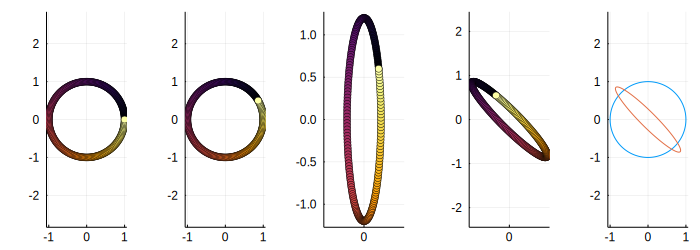

In [173]:
U = [1. -1; 1 1]/sqrt(2)
V = [sqrt(3) 1; -1 sqrt(3)]/2
Σ = [ 0.2 0; 0 1.2]
A = U*Σ*V

# define the unit circle
t = range(0,stop=2π,length=200)
x = [cos.(t) sin.(t)]' 

# apply A = U Σ V' to each point on the circle
x̃ = V'x
ỹ = Σ*x̃
y = U*ỹ

p = plot( x[1,:],x[2,:] )
p = plot!(  y[1,:], y[2,:], aspect_ratio=:equal )
plot(
    scatter(x[1,:],x[2,:], zcolor=t, aspect_ratio=:equal),
    scatter(x̃[1,:],x̃[2,:], zcolor=t, aspect_ratio=:equal),
    scatter(ỹ[1,:],ỹ[2,:], zcolor=t, aspect_ratio=:equal),
    scatter(y[1,:],y[2,:], zcolor=t, aspect_ratio=:equal),
    p, xticks=[-1,0, 1],
    layout=(1,5), legend=:none, colorbar=:none, size=(700,250)
)

## 4.3 Principal Component Analysis

* https://www.youtube.com/watch?v=fkf4IBRSeEc
* https://www.cs.princeton.edu/courses/archive/spring12/cos598C/svdchapter.pdf

## 4.4. Of Interest

* https://www.youtube.com/watch?v=_wOt50VnJw4
* https://www.youtube.com/watch?v=QQ8vxj-9OfQ
* https://towardsdatascience.com/svd-8c2f72e264f
* https://github.com/RoyiAvital/Projects/tree/master/SingularValueDecomposition

# 5. The Pseudoinverse

## 5.1. A Preimage of $y = A x$

Let $A = U \Sigma V^t$ be a singular value decomposition of $A$ and consider $A x = b.$

The substitutions $x = V \tilde{x}$ and $b = U \tilde{b}$ are invertible change of coordinates<br>
that do not change the geometric description of the transformation $A$.

$$A x = b \Leftrightarrow \Sigma \tilde{x} = \tilde{b},\quad \text{ where } \quad
\Sigma = \begin{pmatrix} \Sigma_r & 0 \\ 0 & 0 \end{pmatrix}.\label{eq4}\tag{4}
$$

----
Now split $\tilde{x} = \left( \begin{array}{c} \tilde{x}_r \\ \hline \tilde{\xi} \end{array} \right),
\tilde{b} = \left( \begin{array}{c} \tilde{b}_r \\ \hline \tilde{\beta} \end{array} \right)
$ where the first $r$ entries $\tilde{x}_r$ and $\tilde{b}_r$ <br>
$\quad\quad$ are the $\mathscr{R}(A)$ and $\mathscr{N}(A^t)$
components of the $\tilde{x}$ and $\tilde{b}$ vectors respectively.

Substituting these in Eq 4 yields $\tilde{x}_r = \Sigma_r \tilde{b}_r \Leftrightarrow \tilde{b}_r = \Sigma_r^{-1} \tilde{x}_r.\label{eqn5}\tag{5}$

The components $\tilde{\xi}$ and $\tilde{\beta}$ in the respective nullspaces
do not enter: they are irretrievably lost.<br>
$\quad\quad$ The $\Sigma_r$ matrix in Eq 5 however is invertible. 

---
**Remarks:**
* If we restrict the domain and codomain of $y = A x$ to $\mathscr{R}(A)$ and $\mathscr{C}(A)$ respectively,<br>
the transformation is 1-1 and onto, i.e., it is invertible.
* I.e., for $\tilde{x} = \left( \begin{array}{c} \tilde{x}_r \\ \hline 0 \end{array} \right),
\tilde{b} = \left( \begin{array}{c} \tilde{b}_r \\ \hline 0 \end{array} \right)$,
we have $\begin{pmatrix} \Sigma_r & 0 \\ 0 & 0 \end{pmatrix}\tilde{x} = \tilde{b} \Leftrightarrow
\tilde{b} = \begin{pmatrix} \Sigma_r^{-1} & 0 \\ 0 & 0 \end{pmatrix}\tilde{x} \Leftrightarrow
b = V \begin{pmatrix} \Sigma_r^{-1} & 0 \\ 0 & 0 \end{pmatrix} U^t x.
$

## 5.2 The Pseudoinverse and the Reduced Pseudoinverse

<div style="float:left;width:55%;height:4.9cm;padding:5pt;background-color:#F2F5A9;">

**Definition:** Let $A$ in  $\mathbb{R}^{M \times N}$ have a singular value decomposition $A = U \Sigma V^t$.<br>
$\quad\quad$ The pseudoinverse $A^\dagger = V \Sigma^\dagger U^t$, where
    $$\Sigma^\dagger = \begin{pmatrix} \Sigma_r& 0 \\ 0 & 0 \end{pmatrix}^\dagger =
    \begin{pmatrix} \Sigma_r^{-1} & 0 \\ 0 & 0 \end{pmatrix}$$
    
**Remarks:**
* If $A$ is invertible, $A^\dagger = A^{-1}.$
* The pseudoinverse has a reduced form: $A^\dagger = V_r \Sigma^{-1} U_r^t.$
</div>
<img src="PseudoInverse.svg" width=400/>

#### **Example**

##### **The Earlier SVD Example**

$$ A = \begin{pmatrix}  -3 & -1 & -1 \\
-3 & -1 & -1 \\
1 & 3 & -1 \\
-1 & -3 & 1
 \end{pmatrix} = U \Sigma V^t =
\frac{1}{2}\left( \begin{array}{rr|rr}
-1 & -1 & -\sqrt{2} & 0 \\
-1 & -1 &  \sqrt{2} & 0 \\
 1 & -1 & 0 &  \sqrt{2}\\
-1 &  1 & 0 &  \sqrt{2}
    \end{array} \right) \;
 \left(  \begin{array}{cc|c} \color{red}{4 \sqrt{2}} & 0 & 0\\
                                      0 & \color{red}{2 \sqrt{3}} & 0\\ \hline
                                      0 & 0 & 0 \\
                                      0 & 0 & 0
        \end{array}\right) \;
 \frac{1}{6} \left( \begin{array}{cc|c} 3 \sqrt{2} &  2 \sqrt{3} &\sqrt{6}\\
                                            3 \sqrt{2} & -2 \sqrt{3} & -\sqrt{6} \\
                                            0          & 2 \sqrt{3} & -2 \sqrt{6} \end{array} \right)^t
$$

##### **The PseudoInverse**

$$
A^\dagger = V_r \Sigma_r^{-1} U_r^t =
\frac{1}{6} \left( \begin{array}{cc} 3 \sqrt{2} &  2 \sqrt{3} \\
                                     3 \sqrt{2} & -2 \sqrt{3} \\
                                     0          & 2 \sqrt{3}  \end{array} \right)\;
 \left(  \begin{array}{cc|c} \color{red}{4 \sqrt{2}} & 0\\
                                      0 & \color{red}{2 \sqrt{3}}
        \end{array}\right)^{-1} \;
\frac{1}{2}\left( \begin{array}{rr}
-1 & -1 \\
-1 & -1 \\
 1 & -1 \\
-1 &  1 \end{array} \right)^t
$$

$$
A^\dagger = \frac{1}{48} \left(\begin{array}{rrrr}
-7 & -7 & -1 & 1 \\
1 & 1 & 7 & -7 \\
-4 & -4 & -4 & 4
\end{array}\right)
$$

##### **Repeated Application of $A, A^\dagger$**

The following computation maps $\quad\quad$
$x \in \color{blue}{\mathbb{R}^3} \xrightarrow{A} \color{red}{b_\parallel} \in \color{blue}{\mathscr{C}(A)} \xrightarrow{A\dagger} \color{red}{x_\parallel} \in \color{blue}{\mathscr{R}(A)}  \xrightarrow{A} \color{red}{b_\parallel} \in \color{blue}{\mathscr{C}(A)}, $   $\quad\quad: A A^\dagger A = A$

$$
x = \begin{pmatrix} 2\\ 1 \\ -1 \end{pmatrix} \;\Rightarrow\; \color{red}{b_\parallel} = A x = -6 \begin{pmatrix} 1 \\ 1 \\ -1 \\ 1 \end{pmatrix}
\;\Rightarrow\; \color{red}{x_\parallel} = A^\dagger b_\parallel = \frac{3}{2}\begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix}
\;\Rightarrow\;\color{red}{ b_\parallel} = A x_\parallel =  -6 \begin{pmatrix} 1 \\ 1 \\ -1 \\ 1 \end{pmatrix}
$$

The following computation maps $\quad\quad$
$b \in \color{blue}{\mathbb{R}^4} \xrightarrow{A^\dagger} \color{red}{x_\parallel} \in \color{blue}{\mathscr{R}(A)} \xrightarrow{A} \color{red}{b_\parallel} \in \color{blue}{\mathscr{C}(A)}  \xrightarrow{A\dagger} \color{red}{x_\parallel} \in \color{blue}{\mathscr{R}(A)}, $   $\quad\quad: A^\dagger A A^\dagger = A^\dagger$

$$
b = \begin{pmatrix} -7\\ -5 \\ 7 \\ -5 \end{pmatrix} \;\Rightarrow\; \color{red}{x_\parallel} = A^\dagger b = \frac{3}{2}\begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix}
\;\Rightarrow\; \color{red}{b_\parallel} = A x_\parallel = -6 \begin{pmatrix} 1 \\ 1 \\ -1 \\ 1 \end{pmatrix}
\;\Rightarrow\;\color{red}{ x_\parallel} = A^\dagger b_\parallel = \frac{3}{2}\begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix}
$$

##### **Projection Matrices**

$$
A^\dagger A = \frac{1}{6}\left(\begin{array}{rrr}
5 & 1 & 2 \\
1 & 5 & -2 \\
2 & -2 & 2
\end{array}\right)\quad\quad \text{ is the orthogonal projection}\quad x \in \mathbb{R}^3 \xrightarrow{A^\dagger A} x_\parallel \in \mathscr{R}(A)
$$

$$
A A^\dagger = \frac{1}{2} \left(\begin{array}{rrrr}
1 & 1 & 0 & 0 \\
1 & 1 & 0 & 0 \\
0 & 0 & 1 & -1 \\
0 & 0 & -1 & 1
\end{array}\right)
\quad\quad \text{ is the orthogonal projection}\quad b \in \mathbb{R}^4 \xrightarrow{A A^\dagger} b_\parallel \in \mathscr{C}(A)
$$

##### **Remarks**

* The preimage $x_\parallel = A^\dagger A x$ of $b = A x$ is the **minimum length** solution of $A x = b$
* The preimage $b_\parallel = A A^\dagger b$ of $x = A^\dagger b$ is the **minimum length** solution of $A^t b = x$

## 5.3 Application to the Normal Equation

<div style="float:left;width:50%;height:5.6cm;padding:5pt;background-color:#F2F5A9;">

**Theorem:** Let $A$ in $\mathbb{R}^{M \times N}$ have an SVD factorization $A = U \Sigma V^t$.<br>
    $\quad\quad$ Then $x = A^\dagger b \Rightarrow A^t A x = A^t b$


**Remark:** This theorem states that we can use the pseudoinverse<br>
    $\quad\quad$ to obtain a solution of the normal equation.
</div>
<div style="float:right;width:40%;">
We have to show that $x^\dagger = A^\dagger b$ satisfies $A^t(A x^\dagger - b) = 0$

$\begin{align}
A^t ( A x^\dagger - b ) &= A^t (U \Sigma V^t V \Sigma^\dagger U^t b -b) \\
                &= A^t U(\Sigma \Sigma^\dagger - I) U^t b \\
                &= V \Sigma^t (\Sigma \Sigma^\dagger - I) U^t b \\
                &= 0, \quad \text{since}
\end{align}$

$\begin{align}\Sigma^t ( \Sigma \Sigma^\dagger - I ) & = \Sigma^t \left(\begin{pmatrix} I & 0 \\ 0 & 0 \end{pmatrix} - I\right) = \Sigma^t \begin{pmatrix} 0 & 0 \\ 0 & -I \end{pmatrix} \\
&= \begin{pmatrix} \Sigma_r & 0 \\ 0 & 0 \end{pmatrix} \begin{pmatrix} 0 & 0 \\ 0 & -I \end{pmatrix} = 0\end{align}$
<div>

# 6. Low Rank Approximation

**Idea**

$\quad\quad A = \sigma_1 u_1 v_1^t + \sigma_2 u_2 v_2^t + \dots \sigma_r u_r v_r^t,$, where<br>
$\quad\quad \sigma_1 \ge \sigma_2 \dots \ge \sigma_r >0.$

Terms decrease in importance with increasing index. How about truncating the series?

##### **SVD of the Mandrill Test Image**

In [29]:
using Images, TestImages, MosaicViews
img = float.(testimage("mandrill"))
channels = channelview(img)

function rank_approx(F::SVD, k)
    U, S, V = F
    M = U[:, 1:k] * Diagonal(S[1:k]) * V[:, 1:k]'
    clamp01!(M)
end
svdfactors = svd.(eachslice(channels; dims=1));

##### **Plots**

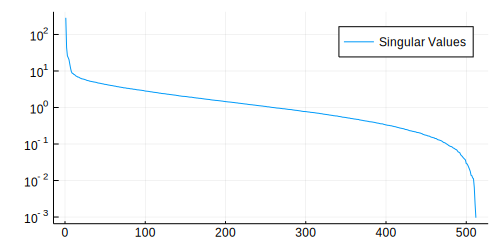

In [28]:
plot( svdfactors[1].S, yscale=:log10, label="Singular Values", size=(500,250))

HTML{String}("<div><p style=\"color:blue;font-size:15pt;height:15px;text-align:left;\">Original Image, 10, 50, 100 terms</p></div>")

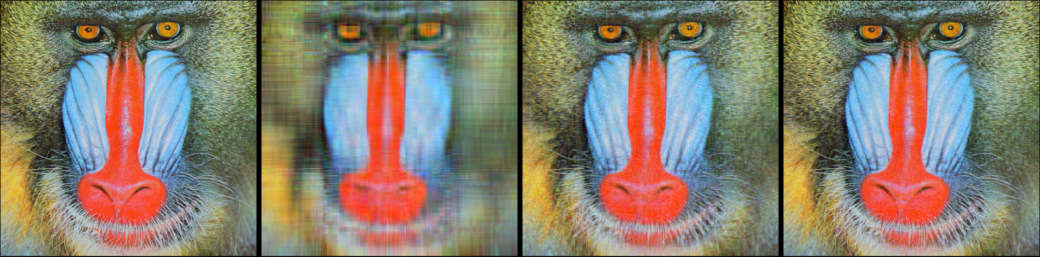

In [32]:
imgs = map((10, 50, 100)) do k
    colorview(RGB, rank_approx.(svdfactors, k)...)
end
title("Original Image, 10, 50, 100 terms",sz=15)
mosaicview(img, imgs...; nrow=1, npad=10)